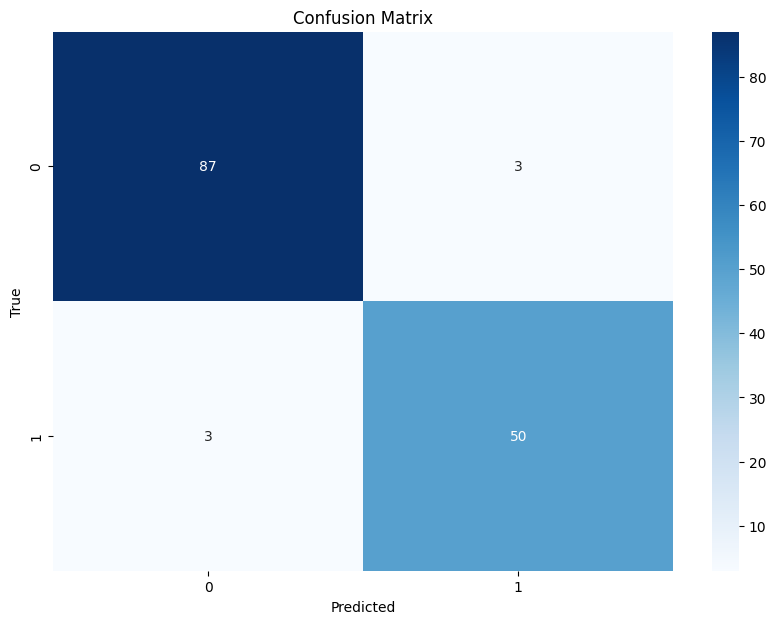

Accuracy: 95.80%


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load data into a dataframe
df = pd.read_csv('data.csv')

# Drop columns with null values
df.dropna(axis=1, inplace=True)

# Encode the diagnosis values
labelencoder_Y = LabelEncoder()
df['diagnosis'] = labelencoder_Y.fit_transform(df['diagnosis'].values)

# Splitting the data into independent (X) and dependent (Y) datasets
X = df.iloc[:, 2:].values
Y = df.iloc[:, 1].values

# Splitting the datasets into training (75%) and testing (25%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Scaling the data (feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# Predict the test set results
Y_pred = classifier.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Get the accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
